In [42]:
# import packages
import pandas as pd
import numpy as np
import json 
from collections import Counter
import matplotlib.pyplot as plt


---
Read in data and format

In [43]:
# reads in data file and format 
# default format of df is this
temp_lst = list()
with open('./data/data.json', 'rb') as f:
    for line in f:
        temp1 = json.loads(line)

        for gene_id, reads in temp1.items():
            
            for read_pos, trans_vals in reads.items():

                for trans_id, vals in trans_vals.items():
                    
                    for val in vals:
                        row1 = (gene_id, read_pos, trans_id, val)
                        temp_lst.append(row1)

df = pd.DataFrame(temp_lst, columns=['transcript_id', 'transcript_position', 'nucleotides', 'val'])
temp = pd.DataFrame(df.val.tolist(), index= df.index)

df = pd.concat([df, temp], axis=1)
df.drop(columns=['val'], inplace=True)
df

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENST00000641834,1693,TTGACAT,0.00418,7.49,108.0,0.00564,10.20,116.0,0.01000,2.01,76.4
11027102,ENST00000641834,1693,TTGACAT,0.00664,1.91,109.0,0.00598,12.30,110.0,0.01760,2.61,74.6
11027103,ENST00000641834,1693,TTGACAT,0.00721,4.58,105.0,0.00398,6.58,113.0,0.00316,2.28,85.3
11027104,ENST00000641834,1693,TTGACAT,0.00266,2.33,109.0,0.00913,10.40,108.0,0.00664,4.44,76.8


---
Feature Engineering/Transformations

Run 1 feature engineer -> input to model 

In [44]:
# no agg 
# temp1 = df.copy()
# temp1 = temp1.astype({'transcript_id':'str','transcript_position': 'str'})

In [45]:
# groupby and agg using mean 
temp1 = df.groupby(by = ['transcript_id', 'transcript_position', 'nucleotides']).mean()
temp1.reset_index(inplace = True)
temp1 = temp1.astype({'transcript_id':'str','transcript_position': 'str'})
temp1

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006101,2.236520,89.154000
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788
...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENST00000641834,610,AGAACTG,0.008452,8.333824,128.941176,0.005721,3.910147,100.847059,0.006148,2.344662,91.914706
121834,ENST00000641834,697,GTGACCT,0.006091,4.303043,98.113043,0.007621,6.968986,121.043478,0.005713,3.511014,79.084058
121835,ENST00000641834,864,TGGACAG,0.008525,3.171591,114.068182,0.009855,6.348409,111.590909,0.006462,3.996136,74.818182
121836,ENST00000641834,926,AGGACAT,0.011754,5.502429,115.900000,0.012544,5.379829,115.342857,0.008119,2.490071,77.300000


In [46]:
# # making each row the flanking nucleotide str no agg
# temp1 = df.copy()

# temp1['n0'] = temp1['nucleotides'].str[:-2]
# temp1['n1'] = temp1['nucleotides'].str[1:-1]
# temp1['n2'] = temp1['nucleotides'].str[2:]

# temp1_n0 = temp1[['transcript_id', 'transcript_position','nucleotides', 'n0', 0, 1, 2]].copy()
# temp1_n1 = temp1[['transcript_id', 'transcript_position','nucleotides', 'n1', 3, 4, 5]].copy()
# temp1_n2 = temp1[['transcript_id', 'transcript_position','nucleotides', 'n2', 6, 7, 8]].copy()

# temp1_n0.rename(columns={'n0': 'nucleotide_pos'}, inplace = True)
# temp1_n1.rename(columns={'n1': 'nucleotide_pos', 3:0, 4:1, 5:2 }, inplace = True)
# temp1_n2.rename(columns={'n2': 'nucleotide_pos', 6:0, 7:1, 8:2 }, inplace = True)

# temp1_n0['flank_pos'] = -1
# temp1_n1['flank_pos'] = 0
# temp1_n2['flank_pos'] = 1


# temp1 = pd.concat([temp1_n0, temp1_n1, temp1_n2], axis=0)
# temp1

In [47]:
# # making each row the flanking nucleotide str with agg mean 
# temp1 = df.copy()

# temp1['n0'] = temp1['nucleotides'].str[:-2]
# temp1['n1'] = temp1['nucleotides'].str[1:-1]
# temp1['n2'] = temp1['nucleotides'].str[2:]

# temp1_n0 = temp1[['transcript_id', 'transcript_position','nucleotides', 'n0', 0, 1, 2]].copy()
# temp1_n1 = temp1[['transcript_id', 'transcript_position','nucleotides', 'n1', 3, 4, 5]].copy()
# temp1_n2 = temp1[['transcript_id', 'transcript_position','nucleotides', 'n2', 6, 7, 8]].copy()

# temp1_n0.rename(columns={'n0': 'nucleotide_pos'}, inplace = True)
# temp1_n1.rename(columns={'n1': 'nucleotide_pos', 3:0, 4:1, 5:2 }, inplace = True)
# temp1_n2.rename(columns={'n2': 'nucleotide_pos', 6:0, 7:1, 8:2 }, inplace = True)

# temp1_n0['flank_pos'] = -1
# temp1_n1['flank_pos'] = 0
# temp1_n2['flank_pos'] = 1


# temp1 = pd.concat([temp1_n0, temp1_n1, temp1_n2], axis=0)

# temp1.drop(columns = ['nucleotides'], inplace=True)
# temp1 = temp1.groupby(by = ['transcript_id', 'transcript_position', 'nucleotide_pos', 'flank_pos']).mean()
# temp1.reset_index(inplace = True)
# temp1 = temp1.astype({'transcript_id':'str','transcript_position': 'str'})
# temp1

# 121838 * 3 == 365514 rows 

In [48]:
# read in label df 
df_labels = pd.read_csv('./data/data.info')
df_labels = df_labels.astype({'transcript_position': 'str', 'transcript_id':'str'})
df_labels 

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0
3,ENSG00000004059,ENST00000000233,332,0
4,ENSG00000004059,ENST00000000233,368,0
...,...,...,...,...
121833,ENSG00000167747,ENST00000641834,1348,1
121834,ENSG00000167747,ENST00000641834,1429,0
121835,ENSG00000167747,ENST00000641834,1531,1
121836,ENSG00000167747,ENST00000641834,1537,0


In [49]:
# joined using transcript_id, transcript_position
df_full = df_labels.merge(temp1, how='left', right_on = ['transcript_id', 'transcript_position'], left_on = ['transcript_id', 'transcript_position'])
df_full.drop_duplicates(inplace=True)
df_full

,gene_id,transcript_id,transcript_position,label,nucleotides,0,1,2,3,4,5,6,7,8
0,ENSG00000004059,ENST00000000233,244,0,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270
1,ENSG00000004059,ENST00000000233,261,0,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698
2,ENSG00000004059,ENST00000000233,316,0,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324
3,ENSG00000004059,ENST00000000233,332,0,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006101,2.236520,89.154000
4,ENSG00000004059,ENST00000000233,368,0,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENSG00000167747,ENST00000641834,1348,1,GGGACAT,0.009594,3.294164,118.232877,0.007300,4.929726,116.342466,0.006555,4.005616,82.004110
121834,ENSG00000167747,ENST00000641834,1429,0,CTGACAC,0.008393,4.511014,110.969565,0.010305,9.105797,114.927536,0.005568,3.644638,80.497101
121835,ENSG00000167747,ENST00000641834,1531,1,TGGACAC,0.008161,3.918438,113.968750,0.006877,4.759688,113.562500,0.006410,2.181563,84.190625
121836,ENSG00000167747,ENST00000641834,1537,0,CTGACCA,0.008044,3.191228,109.354386,0.007419,6.552982,123.263158,0.006472,2.540877,82.289474


---
Start EDA

In [50]:
df_full

,gene_id,transcript_id,transcript_position,label,nucleotides,0,1,2,3,4,5,6,7,8
0,ENSG00000004059,ENST00000000233,244,0,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270
1,ENSG00000004059,ENST00000000233,261,0,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698
2,ENSG00000004059,ENST00000000233,316,0,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324
3,ENSG00000004059,ENST00000000233,332,0,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006101,2.236520,89.154000
4,ENSG00000004059,ENST00000000233,368,0,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENSG00000167747,ENST00000641834,1348,1,GGGACAT,0.009594,3.294164,118.232877,0.007300,4.929726,116.342466,0.006555,4.005616,82.004110
121834,ENSG00000167747,ENST00000641834,1429,0,CTGACAC,0.008393,4.511014,110.969565,0.010305,9.105797,114.927536,0.005568,3.644638,80.497101
121835,ENSG00000167747,ENST00000641834,1531,1,TGGACAC,0.008161,3.918438,113.968750,0.006877,4.759688,113.562500,0.006410,2.181563,84.190625
121836,ENSG00000167747,ENST00000641834,1537,0,CTGACCA,0.008044,3.191228,109.354386,0.007419,6.552982,123.263158,0.006472,2.540877,82.289474


In [51]:
df_full.isna().sum()


gene_id                0
transcript_id          0
transcript_position    0
label                  0
nucleotides            0
0                      0
1                      0
2                      0
3                      0
4                      0
5                      0
6                      0
7                      0
8                      0
dtype: int64

In [52]:
# input for prediction -> (feature cols) -> output probability
# use (transcript_id, transcript_pos) as indexer to look up row values for prediction
df_feature = df_full.drop(columns=['gene_id', 'transcript_id', 'transcript_position', 'label', 'nucleotides'])
df_label = df_full[['label']]

<AxesSubplot:>

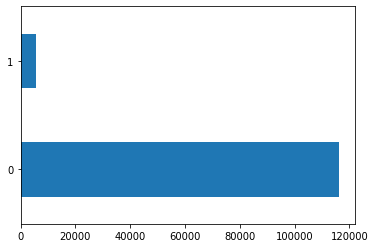

In [53]:
df_label.label.value_counts().plot(kind = 'barh')

Text(0.5, 1.0, 'Correlation Matrix')

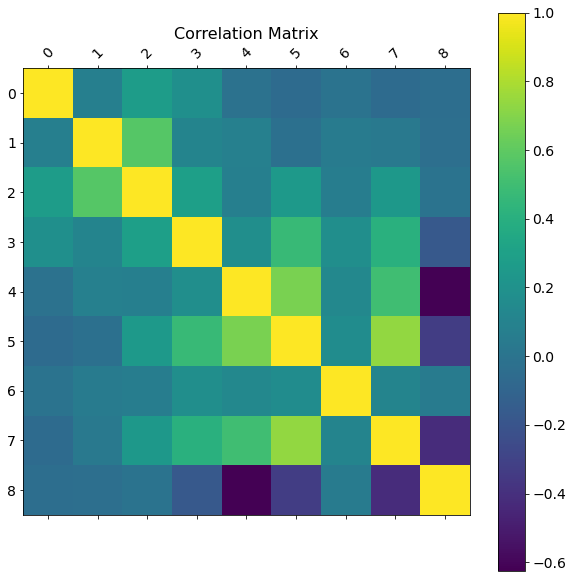

In [54]:
f = plt.figure(figsize=(10, 10))

plt.matshow(df_feature.corr(), fignum=f.number)
plt.xticks(range(df_feature.select_dtypes(['number']).shape[1]), df_feature.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_feature.select_dtypes(['number']).shape[1]), df_feature.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [55]:
# count examples in each class
count_label = Counter(df_label['label'])
# estimate scale_pos_weight value
estimate = count_label[0] / count_label[1]
print('Estimate: %.3f' % estimate)

Estimate: 21.254


In [56]:
from sklearn.model_selection import train_test_split

seed = 42 

X_train, X_test, y_train, y_test  = train_test_split(df_feature, df_label, test_size=0.2, random_state=seed)

In [57]:
# initial model 
import xgboost as xgb
from xgboost import XGBClassifier 
from math import ceil

# fit model on training data
xgb_model = XGBClassifier(objective='binary:logistic',
        scale_pos_weight = ceil(estimate),
        max_delta_step = 1,
        seed = seed,
        verbosity = 3)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred

[23:53:47] ======== Monitor (0): Learner ========
[23:53:47] Configure: 0.000172s, 1 calls @ 172us

[23:53:47] ======== Monitor (0): GBTree ========
[23:53:47] ======== Monitor (0): TreePruner ========
[23:53:47] DEBUG: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:155: Using tree method: 2
[23:53:47] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:53:47] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[23:53:47] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[23:53:47] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes,

array([0, 0, 0, ..., 0, 0, 0])

Accuracy: 86.71%
f1score: 31.16%
Random Classifier: ROC AUC=0.500
Logistic: ROC AUC=0.869


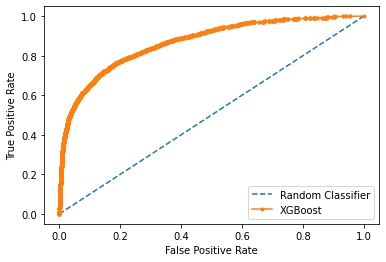

In [58]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
# Model will be evaluated on the ROC AUC and PR AUC of the validation dataset

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1score = f1_score(y_test, y_pred)
print("f1score: %.2f%%" % (f1score * 100.0))


# create random classifier curve
rc_prob = [0 for _ in range(len(y_test))]

y_pred_prob = xgb_model.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

rc_pred_auc = roc_auc_score(y_test, rc_prob)
y_pred_auc = roc_auc_score(y_test, y_pred_prob)

print('Random Classifier: ROC AUC=%.3f' % (rc_pred_auc))
print('Logistic: ROC AUC=%.3f' % (y_pred_auc))

# calculate roc curves
rc_fpr, rc_tpr, _ = roc_curve(y_test, rc_prob)
y_fpr, y_tpr, _ = roc_curve(y_test, y_pred_prob)

# plot the roc curve for the model
pyplot.plot(rc_fpr, rc_tpr, linestyle='--', label='Random Classifier')
pyplot.plot(y_fpr, y_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



Logistic: f1=0.312 auc=0.378


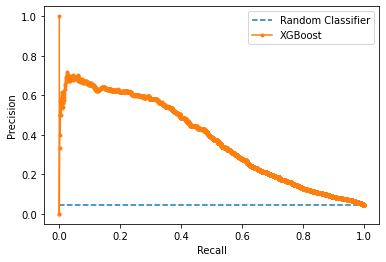

In [18]:
# PR AUC 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# Precision-Recall curves summarize the trade-off between the true positive rate 
# and the positive predictive value for a predictive model using different probability thresholds.

y_pred = xgb_model.predict(X_test)

xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_pred_prob)
xgb_f1, xgb_auc = f1_score(y_test, y_pred), auc(xgb_recall, xgb_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
random_classifier = len(y_test[y_test['label']==1]) / len(y_test)
pyplot.plot([0, 1], [random_classifier, random_classifier], linestyle='--', label='Random Classifier')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

---
Testing against new data

In [19]:
# given new dataset to test 
temp_lst = list()

with open('./data/dataset1.json', 'rb') as f:
    for line in f:
        temp1 = json.loads(line)

        for gene_id, reads in temp1.items():
            
            for read_pos, trans_vals in reads.items():

                for trans_id, vals in trans_vals.items():
                    
                    for val in vals:
                        row1 = (gene_id, read_pos, trans_id, val)
                        temp_lst.append(row1)

df_new = pd.DataFrame(temp_lst, columns=['transcript_id', 'transcript_position', 'nucleotides', 'val'])
temp2 = pd.DataFrame(df_new.val.tolist(), index= df_new.index)

df_new = pd.concat([df_new, temp2], axis=1)
df_new.drop(columns=['val'], inplace=True)
df_new

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8
0,ENST00000000233,244,AAGACCA,0.00465,2.16,127.0,0.00640,3.90,127.0,0.00797,8.75,83.7
1,ENST00000000233,244,AAGACCA,0.02690,4.43,106.0,0.01860,10.00,123.0,0.00863,6.20,80.0
2,ENST00000000233,244,AAGACCA,0.00432,3.10,108.0,0.01200,8.26,125.0,0.01590,2.89,78.7
3,ENST00000000233,244,AAGACCA,0.00996,4.52,123.0,0.01750,8.51,128.0,0.00498,2.63,80.0
4,ENST00000000233,244,AAGACCA,0.00764,2.81,124.0,0.00772,4.22,126.0,0.00474,5.84,80.9
...,...,...,...,...,...,...,...,...,...,...,...,...
7907947,ENST00000641784,3266,CTAACTT,0.00589,1.20,93.5,0.00270,1.58,102.0,0.01530,2.19,92.3
7907948,ENST00000641784,3266,CTAACTT,0.00401,2.00,92.1,0.00764,3.00,99.1,0.00469,1.37,92.6
7907949,ENST00000641784,3266,CTAACTT,0.00430,1.32,91.8,0.00270,1.33,100.0,0.00550,1.37,93.9
7907950,ENST00000641784,3266,CTAACTT,0.00280,2.70,90.7,0.00564,1.45,100.0,0.01600,1.90,92.3


--- 
Create same set of features for prediction

In [20]:
# groupby and agg using mean 
temp1 = df_new.groupby(by = ['transcript_id', 'transcript_position', 'nucleotides']).mean()
temp1.reset_index(inplace = True)
temp1 = temp1.astype({'transcript_id':'str','transcript_position': 'str'})
temp1

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8
0,ENST00000000233,244,AAGACCA,0.008722,3.990545,123.090909,0.010218,6.716545,125.503030,0.006773,3.999745,80.060606
1,ENST00000000233,261,CAAACTG,0.006292,2.849892,109.027711,0.007084,3.197289,107.190964,0.007168,2.686892,94.572289
2,ENST00000000233,316,GAAACAG,0.007237,2.782710,105.440237,0.007050,3.463964,98.539053,0.007141,2.083775,88.985799
3,ENST00000000233,332,AGAACAT,0.010299,6.042386,129.304348,0.008195,2.733641,97.320652,0.005806,2.252565,89.350000
4,ENST00000000233,368,AGGACAA,0.011535,6.031751,118.000000,0.012108,5.748927,121.485876,0.009484,3.958192,85.220904
...,...,...,...,...,...,...,...,...,...,...,...,...
90805,ENST00000641834,610,AGAACTG,0.007565,7.653333,129.896825,0.005600,4.252222,100.357143,0.007293,2.422095,92.107143
90806,ENST00000641834,697,GTGACCT,0.005985,4.637681,96.857246,0.007286,6.642609,120.246377,0.006542,3.406667,79.571739
90807,ENST00000641834,864,TGGACAG,0.009418,3.152476,114.514286,0.012539,6.249714,112.028571,0.007019,3.743048,74.772381
90808,ENST00000641834,926,AGGACAT,0.012353,5.644636,115.536424,0.010178,4.960603,115.331126,0.007489,3.038543,77.717219


In [27]:
new_features = temp1.drop(columns=['transcript_id', 'transcript_position','nucleotides'])

new_y_pred = xgb_model.predict(new_features)
new_y_pred = pd.DataFrame(new_y_pred)
new_y_pred.rename(columns={0:'predicted_label'}, inplace=True)

# fit new feature onto model and predict
new_y_pred_prob = xgb_model.predict_proba(new_features)
new_y_df = pd.DataFrame(new_y_pred_prob, columns=xgb_model.classes_)
new_y_df.rename(columns={0:'class_0', 1:'class_1'}, inplace=True)
new_y_df


,class_0,class_1
0,0.834984,0.165016
1,0.896512,0.103488
2,0.929247,0.070753
3,0.922240,0.077760
4,0.350630,0.649370
...,...,...
90805,0.221021,0.778979
90806,0.821124,0.178876
90807,0.021337,0.978663
90808,0.018840,0.981160


In [28]:
df_new = pd.concat([temp1, new_y_df, new_y_pred], axis=1)
df_new

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,class_0,class_1,predicted_label
0,ENST00000000233,244,AAGACCA,0.008722,3.990545,123.090909,0.010218,6.716545,125.503030,0.006773,3.999745,80.060606,0.834984,0.165016,0
1,ENST00000000233,261,CAAACTG,0.006292,2.849892,109.027711,0.007084,3.197289,107.190964,0.007168,2.686892,94.572289,0.896512,0.103488,0
2,ENST00000000233,316,GAAACAG,0.007237,2.782710,105.440237,0.007050,3.463964,98.539053,0.007141,2.083775,88.985799,0.929247,0.070753,0
3,ENST00000000233,332,AGAACAT,0.010299,6.042386,129.304348,0.008195,2.733641,97.320652,0.005806,2.252565,89.350000,0.922240,0.077760,0
4,ENST00000000233,368,AGGACAA,0.011535,6.031751,118.000000,0.012108,5.748927,121.485876,0.009484,3.958192,85.220904,0.350630,0.649370,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90805,ENST00000641834,610,AGAACTG,0.007565,7.653333,129.896825,0.005600,4.252222,100.357143,0.007293,2.422095,92.107143,0.221021,0.778979,1
90806,ENST00000641834,697,GTGACCT,0.005985,4.637681,96.857246,0.007286,6.642609,120.246377,0.006542,3.406667,79.571739,0.821124,0.178876,0
90807,ENST00000641834,864,TGGACAG,0.009418,3.152476,114.514286,0.012539,6.249714,112.028571,0.007019,3.743048,74.772381,0.021337,0.978663,1
90808,ENST00000641834,926,AGGACAT,0.012353,5.644636,115.536424,0.010178,4.960603,115.331126,0.007489,3.038543,77.717219,0.018840,0.981160,1


In [60]:
# output for dataset1 sample submission 
col_keep = ['transcript_id', 'transcript_position', 'class_1']
df_submit = df_new[col_keep]

df_submit.rename(columns = {'class_1':'score'}, inplace=True)
# df_submit.to_csv('./results/dataset1_submit.csv')
df_submit


C:\Users\hans\AppData\Local\Temp\ipykernel_8268\4150444893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submit.rename(columns = {'class_1':'score'}, inplace=True)


,transcript_id,transcript_position,score
0,ENST00000000233,244,0.165016
1,ENST00000000233,261,0.103488
2,ENST00000000233,316,0.070753
3,ENST00000000233,332,0.077760
4,ENST00000000233,368,0.649370
...,...,...,...
90805,ENST00000641834,610,0.778979
90806,ENST00000641834,697,0.178876
90807,ENST00000641834,864,0.978663
90808,ENST00000641834,926,0.981160


---
Check with data.info labels

In [36]:
# compare with data.info? 
# read in label df 
df_labels = pd.read_csv('./data/data.info')
df_labels = df_labels.astype({'transcript_position': 'str', 'transcript_id':'str'})

In [37]:
# joined using transcript_id, transcript_position
df_full = df_new.merge(df_labels, how='left', right_on = ['transcript_id', 'transcript_position'], left_on = ['transcript_id', 'transcript_position'])
df_full.drop_duplicates(inplace=True)
df_full

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,class_0,class_1,predicted_label,gene_id,label
0,ENST00000000233,244,AAGACCA,0.008722,3.990545,123.090909,0.010218,6.716545,125.503030,0.006773,3.999745,80.060606,0.834984,0.165016,0,ENSG00000004059,0.0
1,ENST00000000233,261,CAAACTG,0.006292,2.849892,109.027711,0.007084,3.197289,107.190964,0.007168,2.686892,94.572289,0.896512,0.103488,0,ENSG00000004059,0.0
2,ENST00000000233,316,GAAACAG,0.007237,2.782710,105.440237,0.007050,3.463964,98.539053,0.007141,2.083775,88.985799,0.929247,0.070753,0,ENSG00000004059,0.0
3,ENST00000000233,332,AGAACAT,0.010299,6.042386,129.304348,0.008195,2.733641,97.320652,0.005806,2.252565,89.350000,0.922240,0.077760,0,ENSG00000004059,0.0
4,ENST00000000233,368,AGGACAA,0.011535,6.031751,118.000000,0.012108,5.748927,121.485876,0.009484,3.958192,85.220904,0.350630,0.649370,1,ENSG00000004059,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90805,ENST00000641834,610,AGAACTG,0.007565,7.653333,129.896825,0.005600,4.252222,100.357143,0.007293,2.422095,92.107143,0.221021,0.778979,1,ENSG00000167747,1.0
90806,ENST00000641834,697,GTGACCT,0.005985,4.637681,96.857246,0.007286,6.642609,120.246377,0.006542,3.406667,79.571739,0.821124,0.178876,0,ENSG00000167747,0.0
90807,ENST00000641834,864,TGGACAG,0.009418,3.152476,114.514286,0.012539,6.249714,112.028571,0.007019,3.743048,74.772381,0.021337,0.978663,1,ENSG00000167747,1.0
90808,ENST00000641834,926,AGGACAT,0.012353,5.644636,115.536424,0.010178,4.960603,115.331126,0.007489,3.038543,77.717219,0.018840,0.981160,1,ENSG00000167747,1.0


In [38]:
df_full.isna().sum()

transcript_id              0
transcript_position        0
nucleotides                0
0                          0
1                          0
2                          0
3                          0
4                          0
5                          0
6                          0
7                          0
8                          0
class_0                    0
class_1                    0
predicted_label            0
gene_id                23490
label                  23490
dtype: int64

In [39]:
# only see those that have label and compare metric
df_full = df_full[~df_full['label'].isnull()]
df_full

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,class_0,class_1,predicted_label,gene_id,label
0,ENST00000000233,244,AAGACCA,0.008722,3.990545,123.090909,0.010218,6.716545,125.503030,0.006773,3.999745,80.060606,0.834984,0.165016,0,ENSG00000004059,0.0
1,ENST00000000233,261,CAAACTG,0.006292,2.849892,109.027711,0.007084,3.197289,107.190964,0.007168,2.686892,94.572289,0.896512,0.103488,0,ENSG00000004059,0.0
2,ENST00000000233,316,GAAACAG,0.007237,2.782710,105.440237,0.007050,3.463964,98.539053,0.007141,2.083775,88.985799,0.929247,0.070753,0,ENSG00000004059,0.0
3,ENST00000000233,332,AGAACAT,0.010299,6.042386,129.304348,0.008195,2.733641,97.320652,0.005806,2.252565,89.350000,0.922240,0.077760,0,ENSG00000004059,0.0
4,ENST00000000233,368,AGGACAA,0.011535,6.031751,118.000000,0.012108,5.748927,121.485876,0.009484,3.958192,85.220904,0.350630,0.649370,1,ENSG00000004059,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90805,ENST00000641834,610,AGAACTG,0.007565,7.653333,129.896825,0.005600,4.252222,100.357143,0.007293,2.422095,92.107143,0.221021,0.778979,1,ENSG00000167747,1.0
90806,ENST00000641834,697,GTGACCT,0.005985,4.637681,96.857246,0.007286,6.642609,120.246377,0.006542,3.406667,79.571739,0.821124,0.178876,0,ENSG00000167747,0.0
90807,ENST00000641834,864,TGGACAG,0.009418,3.152476,114.514286,0.012539,6.249714,112.028571,0.007019,3.743048,74.772381,0.021337,0.978663,1,ENSG00000167747,1.0
90808,ENST00000641834,926,AGGACAT,0.012353,5.644636,115.536424,0.010178,4.960603,115.331126,0.007489,3.038543,77.717219,0.018840,0.981160,1,ENSG00000167747,1.0


In [41]:
# evaluate predictions
accuracy = accuracy_score(df_full['predicted_label'], df_full['label'])
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1score = f1_score(df_full['predicted_label'], df_full['label'])
print("f1score: %.2f%%" % (f1score * 100.0))

Accuracy: 84.72%
f1score: 32.15%
